In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision.transforms import Compose
from torchvision import transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
import json
import math
import random

from utils_data import *
from utils_train import *
from utils_test import *
from utils_hparams import *

import matplotlib

In [2]:
data_dir =   '/home/projects/bagon/ingap/cifar10_analysis/cifar10_analysis/cifar10_data/cifar10'
result_dir = '/home/projects/bagon/ingap/cifar10_analysis/cifar10_analysis/results/'
result_dir = os.path.expanduser(result_dir)

## Optimal model parameters

In [3]:
results_path = result_dir + 'optimal_model_2024-02-28_12-23-42/'

best_model_path_name = results_path + 'model_optimal_model_best.pth'
last_model_path_name = results_path + 'model_optimal_model_last.pth'

batch_size = 256
hparams_model = "ResNet_34"

## Datasets Load

In [4]:
device = get_default_device()

Data with test set preprocessing => for model's prediction

In [5]:
train_ds, test_ds = chose_preprocess("N1_aug",data_dir)
test_dl = DeviceDataLoader(DataLoader(test_ds, batch_size), device)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Data without preprocessing for image plot

In [6]:
train_ds_clean, test_ds_clean = chose_preprocess("No",data_dir)

Files already downloaded and verified
Files already downloaded and verified


## Best Optimal Model Load

In [7]:
model_best_optimal = chose_model(hparams_model,device)

In [8]:
model_best_optimal.load_state_dict(torch.load(best_model_path_name))

<All keys matched successfully>

## Inference evaluation

In [9]:
#cifar10_labels = ["aircraft", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cifar10_labels = train_ds.classes

In [10]:
file_name = results_path + "inference_best_model.json"
experiment_name = "inference_best_model"
evaluate_summary(model_best_optimal, test_dl, experiment_name, file_name, device, results_path, cifar10_labels)

** accuracy: 0.9170
--
confusion matrix
[[916   4  18  11   7   0   7   4  28   5]
 [  1 970   0   1   1   0   2   0   7  18]
 [ 18   0 886  19  25  14  29   4   4   1]
 [  7   1  35 826  16  67  31   9   4   4]
 [  2   0  15  15 918  15  20  14   1   0]
 [  3   0  14  79  10 869   8  14   1   2]
 [  5   1  21  15   2   3 951   1   0   1]
 [  5   0  10  13  11  13   2 943   1   2]
 [ 18   8   3   5   2   0   2   0 950  12]
 [  8  34   0   5   0   1   1   1   9 941]]
--
classification report
              precision    recall  f1-score   support

    airplane       0.93      0.92      0.92      1000
  automobile       0.95      0.97      0.96      1000
        bird       0.88      0.89      0.89      1000
         cat       0.84      0.83      0.83      1000
        deer       0.93      0.92      0.92      1000
         dog       0.88      0.87      0.88      1000
        frog       0.90      0.95      0.93      1000
       horse       0.95      0.94      0.95      1000
        ship     

To disable matplotlib.use('Agg')  # Use Agg backend which imported from the modules

In [11]:
import matplotlib.pyplot as plt
plt.switch_backend('module://ipykernel.pylab.backend_inline')

## Incorrect predictions

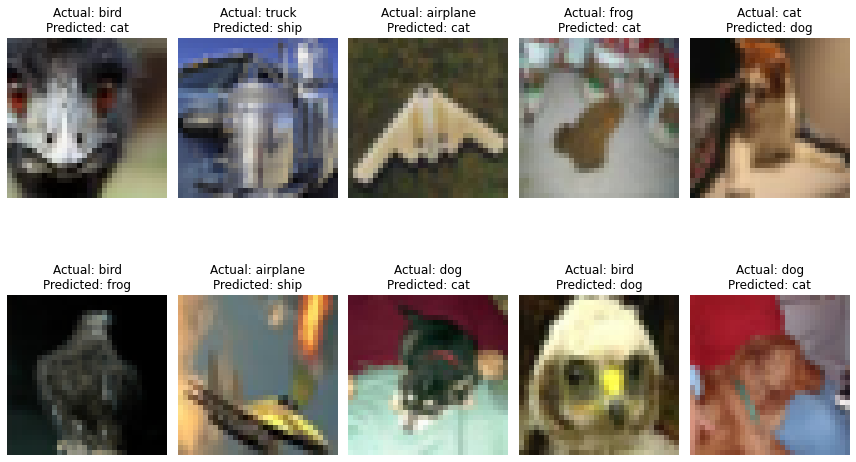

In [12]:
show_incorrect_pred(test_ds_clean, test_ds,model_best_optimal,device)

## Correct predictions

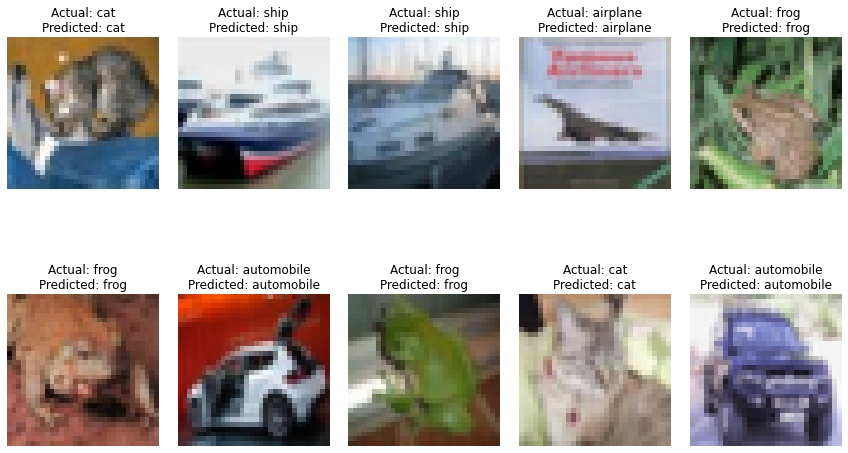

In [13]:
show_correct_pred(test_ds_clean,test_ds,model_best_optimal,device)

## The END